# <center><u>Credit Card Fraud Detection as a Classification Problem</u></center>
### <center><u>Author: Sai Yaswanth</u></center> 

### Business Problem
It is vital that credit card companies are able to
identify fraudulent credit card transactions so that customers
are not charged for items that they did not purchase. Such
problems can be tackled with Data Science and its importance,
along with Machine Learning, cannot be overstated. This
project intends to illustrate the modelling of a data set using
machine learning with Credit Card Fraud Detection. 

### Notebook Description
This notebook is fully written in Python 3.0 version. For each code chunk appropriate description is given. Although it is expected that the reader has a preliminary experience with Python. Regarding the methodologies used in this notebook, we always tried to provide a concise theoretical background. <br/>
Now we are good to go. Let's start...

### What is the first step
Now that we have an idea about the business problem, the first step here should be to have a superficial look at the data and try to understand the features. This is not where we try to go deep and interprete the meaning of outliers or missing values. At first we load all the necessary modules and stup the environment.

In [1]:
# Importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data Description
Now we read the data and try to understand the meaning of each of the feature. The python module pandas provides us with the functions to read a data. In the next step we will read the data from our directory where the data is saved and then we look at the first five and last five rows of the data using head() and tail() attributes.

In [2]:
data = pd.read_csv("creditcard.csv")
data.head().append(data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


The time is recorded in the number of seconds since the first transaction in the data set. Therefore, we can conclude that this data set includes all transactions recorded over the course of two days. The features was prepared using PCA and so the physical interpretation of individual features does not make sense. The only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Exploration and Visualization
Now we try to find out the relative proportion of valid and fraudulent credit card transactions.

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


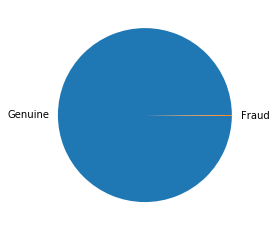

In [3]:
print("Fraudulent Cases: " + str(len(data[data["Class"] == 1])))
print("Valid Transactions: " + str(len(data[data["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data["Class"] == 1])/ data.shape[0]))

# To see how small are the number of Fraud transactions
data_pi = data.copy()
data_pi[" "] = np.where(data_pi["Class"] == 1 ,  "Fraud", "Genuine")

%matplotlib inline
data_pi[" "].value_counts().plot(kind="pie")

Clearly there is an imbalance in the data with only 0.17% of the total cases are fraudulent. For a quick curiosity let us check if there is any difference between the amount of valid transaction and fraudulent transactions

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Now we look at the distribution of the two named features in the dataset. For Time, it is clear that there were certain duration in the day when most of the transactions took place.

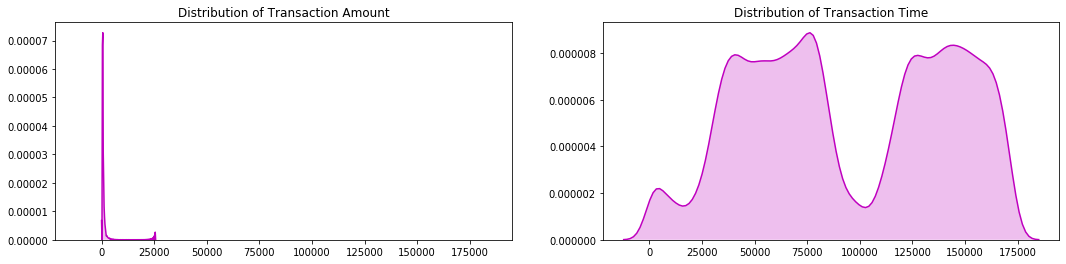

In [5]:
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Transaction Amount')
sns.distplot(time_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Transaction Time')

plt.show()

In [6]:
print("Average Amount in a Fraudulent Transaction: " + str(data[data["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(data[data["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821133
Average Amount in a Valid Transaction: 88.29102242225574


As we can clearly notice from this, the average Money transaction for the fraudulent ones are more. This makes this problem crucial to deal with. Now let us try to understand the distribution of values in each of the features. Let's start with the Amount.

In [7]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(data["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


The rest of the features don't have any physical interpretation and will be seen through histograms. Here the values are subgrouped according to Class (valid or fraud).

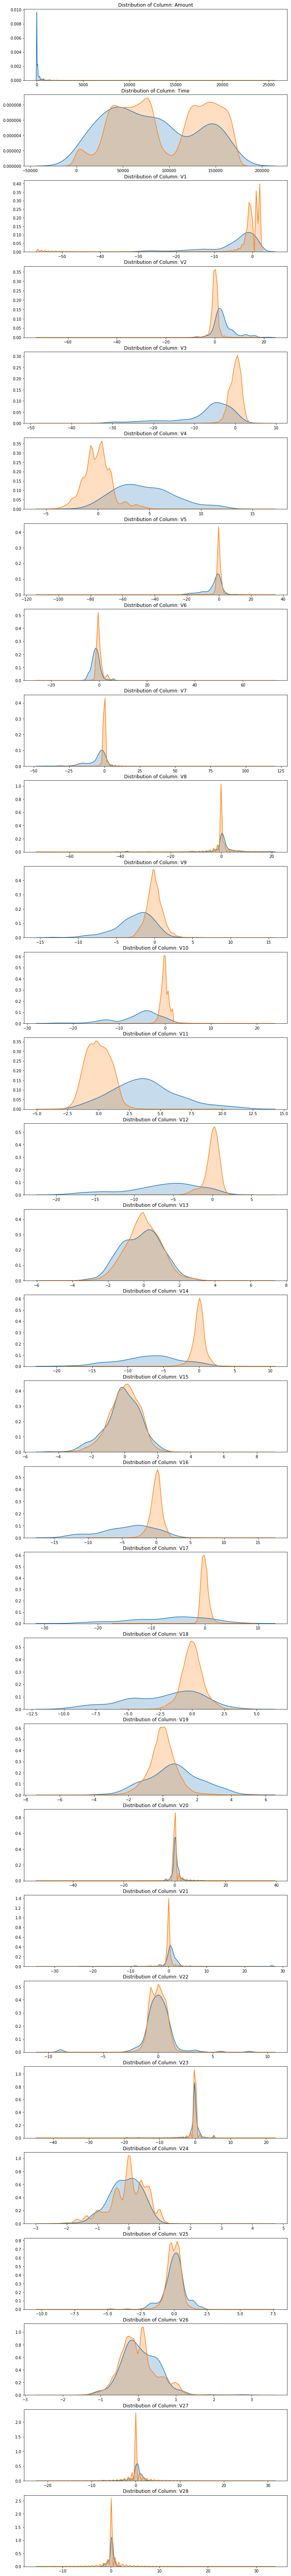

In [8]:
# Reorder the columns Amount, Time then the rest
data_plot = data.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()


### Data Preparation and Missing Data
The features are created using PCA and so the feature selection is not necessary as the number of features is small as well. Now we turn to the treatment of Missing values in the dataframe.

In [9]:
data.isnull().shape[0]
print("Number of cases with non-missing values: " + str(data.isnull().shape[0]))
print("Number of cases with missing values: " + str(data.shape[0] - data.isnull().shape[0]))

Number of cases with non-missing values: 284807
Number of cases with missing values: 0


As there are no missing data, we turn to standardization. We standardize only Time and Amount using RobustScaler.

In [10]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(data[["Time", "Amount"]])
data[["Time", "Amount"]] = scaler.transform(data[["Time", "Amount"]])

data.head().append(data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


### Modelling
Now we start modelling.
First we divide the data into response and features. And also make the train-test split of the data for further modelling and validation.

In [11]:
# Separate response and features
y = data["Class"]
X = data.iloc[:,0:30]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)



Now we describe the flow of the modelling section first and then dive into the sea. As we identified earlier, the dataset is highly imbalanced. Fitting a model on this dataset will result in overfitting towards the majority class. For illustration let's run one model (Random Forest) on the imbalanced data and see the performance.

In [12]:
# Using SKLEARN module for random forest
from sklearn.ensemble import RandomForestClassifier 

# Fit and predict
naive_rfc = RandomForestClassifier() 
naive_rfc.fit(X_train, y_train) 
naive_test_preds = naive_rfc.predict(X_test)


# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score
  
print("The accuracy is {}".format(accuracy_score(y_test, naive_test_preds) )) 
print("The precision is {}".format(precision_score(y_test, naive_test_preds)))
print("The recall is {}".format(recall_score(y_test, naive_test_preds) )) 


The accuracy is 0.9995786664794073
The precision is 0.9868421052631579
The recall is 0.7653061224489796


One thing to notice here is, we had only 0.17% cases with fraud transactions and a model predicting all trasactions to be valid would have similar accuracy. So we need to train our model in a way that is not overfitted to either of the classes. for this, we introduce Oversampling and Undersampling methods. 
Oversampling resamples from the minority class to balance the class proportions. And undersampling merges or removes similar observations from the majority to achive the same.

### Undersampling


In this section we first describe the structure of the modelling and validations. One trivial point to note is, we will not undersample the test data as we want our model to perform well with skewed class distributions eventually.
The steps are as follows (The whole set-up will be structured using the imbalance-learn module): 
* Use a 5-fold cross validation on the training set
* On each of the folds use undersampling 
* Fit the model on the training folds and validate on the validation fold

In [13]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = False)

In [14]:
# Import the imbalance Learn module
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


Now that we have all the libraries and module imported, we start with the classifiers.
#### Undersampling - Logistic Regression

In [ ]:
# Logistic Regression 
imba_pipeline = make_pipeline(NearMiss(), 
                              LogisticRegression())

log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [ 0.01, 0.1, 1, 100], 
                  'solver' : ['liblinear']}

new_params = {'logisticregression__' + key: log_reg_params[key] for key in log_reg_params}
grid_imba_log_reg = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

grid_imba_log_reg.fit(X_train, y_train);
logistic_cv_score_us = cross_val_score(grid_imba_log_reg, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict(X_test)
logistic_recall_us = recall_score(y_test, y_test_predict)
logistic_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Logistic Regression: " + str(ulogistic_cv_score.mean()))
# print("Recall Score for Logistic Regression: " + str(ulogistic_recall))
log_reg_us = grid_imba_log_reg.best_estimator_

In [41]:
log_reg_us

Pipeline(steps=[('nearmiss', NearMiss()),
                ('logisticregression',
                 LogisticRegression(C=100, penalty='l1', solver='liblinear'))])

In [17]:
# Cumulatively create a table for the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
yproba = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Logistic Regression",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

#### Undersampling - Random Forest 

In [18]:
# Define the pipeline
imba_pipeline = make_pipeline(NearMiss(), 
                              RandomForestClassifier())
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba_rf = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

grid_imba_rf.fit(X_train, y_train);

rfc_cv_score_us = cross_val_score(grid_imba_rf, X_train, y_train, scoring='recall', cv=kf)

y_test_predict = grid_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)
rfc_recall_us = recall_score(y_test, y_test_predict)
rfc_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Random Forest: " + str(urfc_cv_score.mean()))
# print("Recall Score for Random Forest: " + str(urfc_recall))
rfc = grid_imba_rf.best_estimator_

In [19]:
rfc

Pipeline(steps=[('nearmiss', NearMiss()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=12, n_estimators=50,
                                        random_state=13))])

In [20]:

# Cumulatively create a table for the ROC curve
yproba = grid_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Random Forest",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

#### Undersampling - Support Vector Classifier

In [21]:
# Define the pipeline
imba_pipeline = make_pipeline(NearMiss(), 
                              SVC(probability = True))
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

new_params = {'svc__' + key: svc_params[key] for key in svc_params}
grid_imba_svc = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

grid_imba_svc.fit(X_train, y_train);

svc_cv_score_us = cross_val_score(grid_imba_svc, X_train, y_train, scoring='recall', cv=kf)

y_test_predict = grid_imba_svc.best_estimator_.named_steps['svc'].predict(X_test)
svc_recall_us = recall_score(y_test, y_test_predict)
svc_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Support Vector Classifier: " + str(usvc_cv_score.mean()))
# print("Recall Score for Support Vector Classifier: " + str(usvc_recall))
svc = grid_imba_svc.best_estimator_

In [22]:
svc

Pipeline(steps=[('nearmiss', NearMiss()),
                ('svc', SVC(C=1, kernel='linear', probability=True))])

In [23]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_svc.best_estimator_.named_steps['svc'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Support Vector Classifier",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

#### Undersampling - Decision Tree Classifier

In [24]:
# DecisionTree Classifier
imba_pipeline = make_pipeline(NearMiss(), 
                              DecisionTreeClassifier())

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
new_params = {'decisiontreeclassifier__' + key: tree_params[key] for key in tree_params}
grid_imba_tree = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)


grid_imba_tree.fit(X_train, y_train);
dtree_cv_score_us = cross_val_score(grid_imba_tree, X_train, y_train, scoring='recall', cv=kf)


y_test_predict = grid_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict(X_test)
dtree_recall_us = recall_score(y_test, y_test_predict)
dtree_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Decision Tree Classifier: " + str(udtree_cv_score.mean()))
# print("Recall Score for Decision Tree Classifier: " + str(udtree_recall))
tree_clf = grid_imba_tree.best_estimator_

In [25]:
tree_clf

Pipeline(steps=[('nearmiss', NearMiss()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=6))])

In [26]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Decision Tree",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

#### Undersampling - k-Nearest Neighbour Classifier

In [27]:
# KNeighbors Classifier
imba_pipeline = make_pipeline(NearMiss(), 
                              KNeighborsClassifier())

knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

new_params = {'kneighborsclassifier__' + key: knears_params[key] for key in knears_params}
grid_imba_knn = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

grid_imba_knn.fit(X_train, y_train);
knear_cv_score_us = cross_val_score(grid_imba_knn, X_train, y_train, scoring='recall', cv=kf)


y_test_predict = grid_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict(X_test)
knear_recall_us = recall_score(y_test, y_test_predict)
knear_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for k-Nearest Neighbour Classifier: " + str(uknear_cv_score.mean()))
# print("Recall Score for k-Nearest Neighbour Classifier: " + str(uknear_recall))
knears_neighbors = grid_imba_knn.best_estimator_

In [28]:
knears_neighbors

Pipeline(steps=[('nearmiss', NearMiss()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [29]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "k-Nearest Neighbour",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

Summarize the undersampling model performances

In [33]:
# Gather the scores
data_score = [['Logistic Regression', logistic_cv_score_us.mean(), logistic_recall_us], 
        ['Random Forest', rfc_cv_score_us.mean(), rfc_recall_us], 
        ['Support Vector', svc_cv_score_us.mean(), svc_recall_us],
        ['Decision Tree', dtree_cv_score_us.mean(), dtree_recall_us],
        ['k-Nearest Neighbour', knear_cv_score_us.mean(), knear_recall_us]
             ] 
  
# Create the dataframe 
data_table = pd.DataFrame(data_score, columns = ['Classifier', 'CV Score', 'Recall Score']) 
data_table

,Classifier,CV Score,Recall Score
0,Logistic Regression,0.936579,0.959184
1,Random Forest,0.961960,0.969388
2,Support Vector,0.931516,0.928571
3,Decision Tree,0.918858,0.948980
4,k-Nearest Neighbour,0.911165,0.938776


Now we plot the ROC curve for the above classifiers.

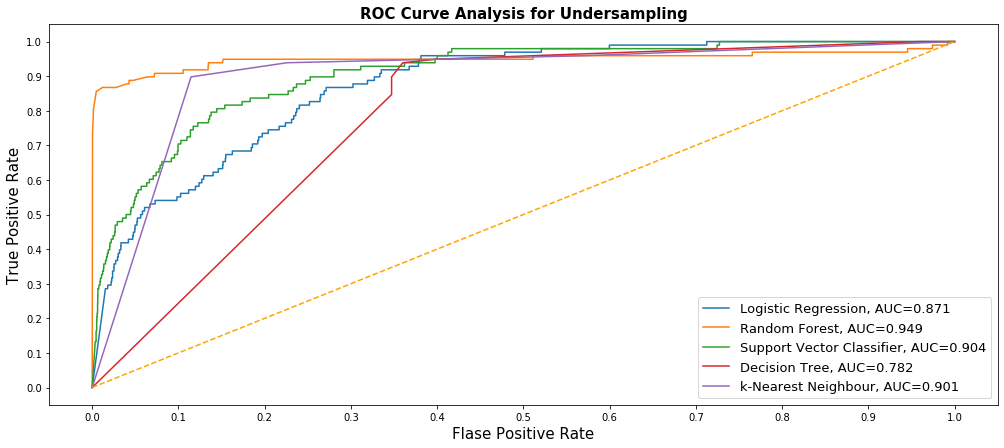

In [34]:
# Plot the ROC curve for undersampling
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Undersampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### The Learning Curve
Here we choose 4 models and try to see the trend of training and cross-validation scores over varrying training size. A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

<module 'matplotlib.pyplot' from '/Users/sYaswan/Documents/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

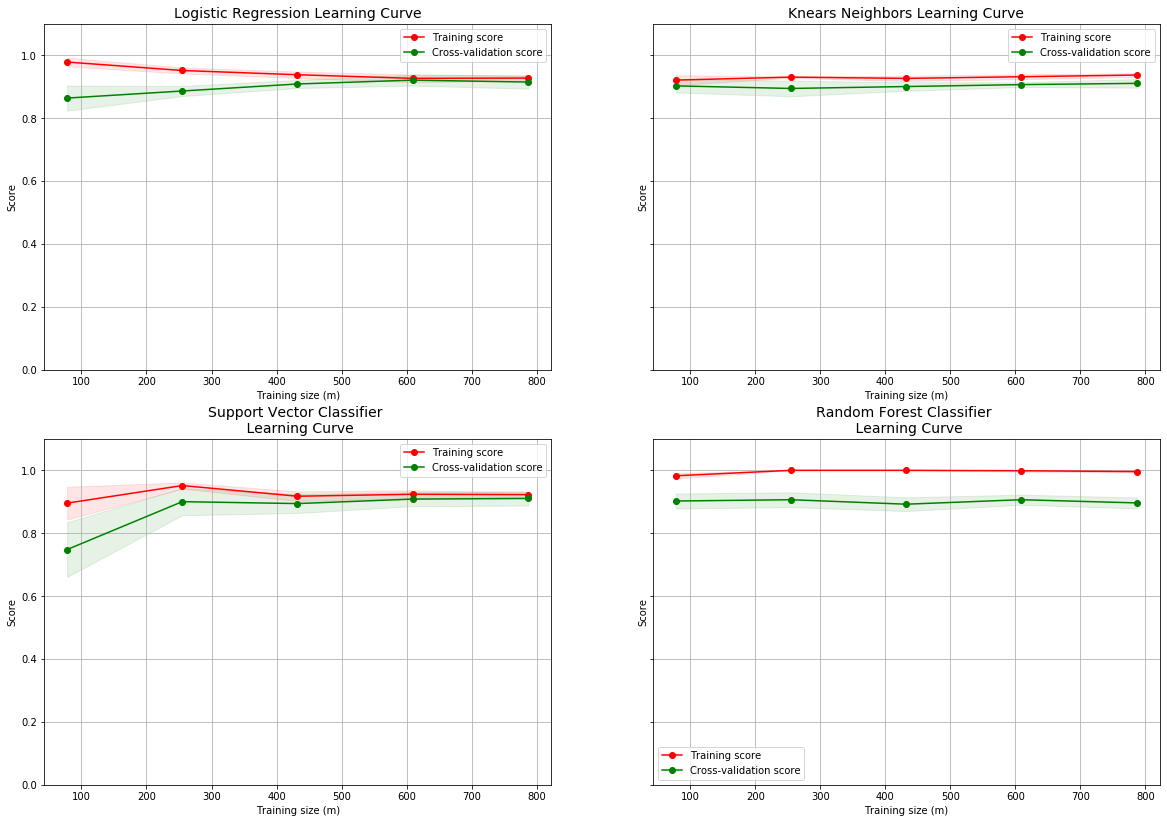

In [37]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax4.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)



df = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
y = new_df["Class"]
X = new_df.iloc[:,0:30]

plot_learning_curve(log_reg_us, knears_neighbors, svc, rfc, X, y, (0.00, 1.10))

### Oversampling

In this section we first describe the structure of the modelling and validations. One trivial point to note is, we will not oversample the test data as we want our model to perform well with skewed class distributions eventually.
The steps are as follows (The whole set-up will be structured using the imbalance-learn module): 
* Use a 5-fold cross validation on the training set
* On each of the folds use oversampling 
* Fit the model on the training folds and validate on the validation fold

Note that we will use the best model parameters as obtained from grid-search algorithm in Undersampling.

In [30]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100], 
                 'solver' : ['liblinear']}

new_params = {'logisticregression__' + key: log_reg_params[key] for key in log_reg_params}
ran_imba_log_reg = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_log_reg.fit(X_train, y_train);

logistic_cv_score_os = cross_val_score(ran_imba_log_reg, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict(X_test)
logistic_recall_os = recall_score(y_test, y_test_predict)
logistic_accuracy_os = accuracy_score(y_test, y_test_predict)

log_reg_os = ran_imba_log_reg.best_estimator_

In [39]:
ran_imba_log_reg.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=100, penalty='l1', solver='liblinear'))])

In [59]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
ran_imba_rf = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_rf.fit(X_train, y_train);

rf_cv_score_os = cross_val_score(ran_imba_rf, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)
rfc_recall_os = recall_score(y_test, y_test_predict)

rfc_os = ran_imba_rf.best_estimator_

In [60]:
rfc_os

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=50,
                                        random_state=13))])

In [69]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              SVC())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

new_params = {'svc__' + key: svc_params[key] for key in svc_params}
ran_imba_svc = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_svc.fit(X_train, y_train);

svc_cv_score_os = cross_val_score(ran_imba_svc, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_svc.best_estimator_.named_steps['svc'].predict(X_test)
svc_recall_os = recall_score(y_test, y_test_predict)

svc_os = ran_imba_svc.best_estimator_

In [70]:
svc_os

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('svc', SVC(C=0.7))])

In [74]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              DecisionTreeClassifier())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
new_params = {'decisiontreeclassifier__' + key: tree_params[key] for key in tree_params}
ran_imba_tree = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_tree.fit(X_train, y_train);

dtree_cv_score_os = cross_val_score(ran_imba_tree, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict(X_test)
dtree_recall_os = recall_score(y_test, y_test_predict)

tree_os = ran_imba_tree.best_estimator_

In [76]:
tree_os

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=6))])

In [85]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

new_params = {'kneighborsclassifier__' + key: knears_params[key] for key in knears_params}
ran_imba_knn = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_knn.fit(X_train, y_train);

knear_cv_score_os = cross_val_score(ran_imba_knn, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict(X_test)
knear_recall_os = recall_score(y_test, y_test_predict)

knears_neighbors_os = ran_imba_knn.best_estimator_

In [86]:
knears_neighbors_os

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Now we summarize all the recall scores in a table for comparison.

In [89]:
# Gather the scores
final_scores = [['Logistic Regression', logistic_recall_us, logistic_recall_os], 
        ['Random Forest', rfc_recall_us, rfc_recall_os], 
        ['Support Vector', svc_recall_us, svc_recall_os],
        ['Decision Tree', dtree_recall_us, dtree_recall_os],
        ['k-Nearest Neighbour', knear_recall_us, knear_recall_os]
             ] 
  
# Create the dataframe 
final_df = pd.DataFrame(final_scores, columns = ['Classifier', 'Random UnderSampling', 'Oversampling (SMOTE)']) 
final_df

,Classifier,Random UnderSampling,Oversampling (SMOTE)
0,Logistic Regression,0.959184,0.918367
1,Random Forest,0.969388,0.934582
2,Support Vector,0.928571,0.891426
3,Decision Tree,0.948980,0.921675
4,k-Nearest Neighbour,0.938776,0.917557


Plot the ROC curve for Oversampling

In [ ]:
# Plot the ROC curve for undersampling
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Oversampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Now it is time to see the learning curves for the best models in terms of performance.

### Conclusion
* For Oversampling Logistic Regression performed better than other models
* For Undersampling Random Forest performed better than other models
* Overall, we choose Random Forest with undersampling to be the best predictor for this particular problem

## <center><u>Buffer Topics</u></center> 

### 1. Outlier Detection and Removal

Presence of outlier sometimes affect the model and might lead us to wrong conclusions. Therefore it is important that we have a look at the distribution of the data while keeping a close eye on the outliers. In this section we use the IQR (Interquartile Range) method to idetify and remove the outliers.

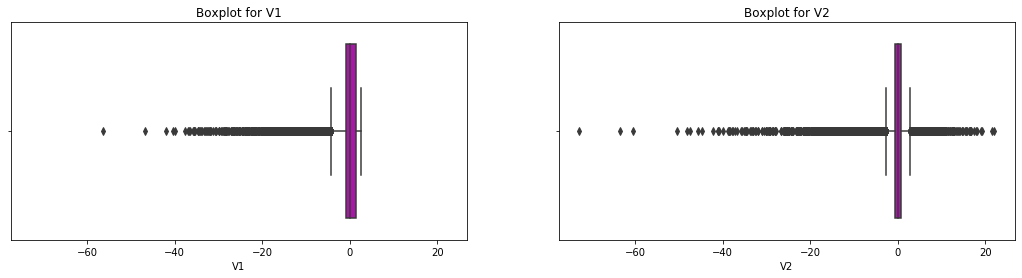

In [90]:
# boxplot for two example variables in the dataset

f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

variable1 = data["V1"]
variable2 = data["V2"]

sns.boxplot(variable1, color="m", ax=axes[0]).set_title('Boxplot for V1')
sns.boxplot(variable2, color="m", ax=axes[1]).set_title('Boxplot for V2')

plt.show()

Now that we have a visualization of the outliers and the distribution of two variables, we can think of identifying the observations that are extreme on either side of the box (see above plots) as outliers. First we try to calculate the IQR of the features. 
\begin{equation}
\mbox{IQR} = \mbox{Third quartile} - \mbox{First quartile}
\end{equation}

In [91]:
# Find the IQR for all the feature variables
# Please note that we are keeping Class variable also in this evaluation, though we know using this method no observation
# be removed based on this variable.

quartile_1 = data.quantile(0.25)
quartile_3 = data.quantile(0.75)

IQR = quartile_3 - quartile_1
print(IQR)

Time      1.000000
V1        2.236015
V2        1.402274
V3        1.917560
V4        1.591981
V5        1.303524
V6        1.166861
V7        1.124512
V8        0.535976
V9        1.240237
V10       0.989349
V11       1.502088
V12       1.023810
V13       1.311044
V14       0.918724
V15       1.231705
V16       0.991333
V17       0.883423
V18       0.999657
V19       0.915248
V20       0.344762
V21       0.414772
V22       1.070904
V23       0.309488
V24       0.794113
V25       0.667861
V26       0.567936
V27       0.161885
V28       0.131240
Amount    1.000000
Class     0.000000
dtype: float64


Now that we have the Interquartile range for each of the variables, we just remove the observations with outlier values. Please note that we have used "outlier constant" to be 3.

In [92]:
# Remove the outliers 

constant = 3
data_valid = data[~((data < (quartile_1 - constant * IQR)) |(data > (quartile_3 + constant * IQR))).any(axis=1)]
deleted_rows = data.shape[0] - data_valid.shape[0]
print("We have removed " + str(deleted_rows) + " rows from the data as outliers")

We have removed 53376 rows from the data as outliers


Please note that we did not use the outlier detection because sometimes we want the features in the model to have some extreme values to train the model accordingly. Also, this problem was an example of anomaly detection (remember we had only 0.17% of fraud transactions in the data) and hence we did not want to get rid of the extreme values in features.